# <span style="color:blue">Project title/3: "Forecasting the power consumption in three localities of Tetouan in Morocco</span>

## <span style="color:brown">1. Data Collection & Project Presentation</span>

<p><b>Content</b></p>
<p>    Tetouan is a city located in northern Morocco with an area of approximately 10,375 km² and a population of about 550,374 inhabitants.
    The city experiences a mild and rainy climate in winter and hot and dry weather during the summer months due to its location along the Mediterranean Sea.
    Morocco's per capita energy consumption is 0.56 toe, which is 42% below the North Africa average, and its electricity consumption is around 900 kWh, 38% below the regional average.
    The national production of hydrocarbons in Morocco is low, and all oil products are imported since the country's only refinery closed down in 2015.
    The electricity distribution network in Tetouan is operated by Amendis, which receives energy from the National Office of Electricity and Drinking Water and serves low and medium voltage consumers through three Zone stations: Quads, Smir, and Boussafou.</p><br>
    
<p><b>Content</b></p>
<p>The data consists of 52,416 observations of energy consumption on a 10-minute window. Every observation is described by 9 feature columns.
    1. Date Time: Time window of ten minutes.<br>
    2. Temperature: Weather Temperature.<br>
    3. Humidity: Weather Humidity.<br>
    4. Wind Speed: Wind Speed.<br>
    5. General Diffuse Flows: “Diffuse flow” is a catchall term to describe low-temperature (< 0.2° to ~ 100°C) fluids that slowly discharge through sulfide mounds, fractured lava flows, and assemblages of bacterial mats and macrofauna.<br>
    6. Diffuse Flows<br>
    7. Zone 1 Power Consumption<br>
    8. Zone 2 Power Consumption<br>
    9. Zone 3 Power Consumption</p>

<p><b>Objective</b></p>
<p>The purpose of this project is to utilize deep learning models to train on the dataset, aiming to <b>predict the power consumption for the next 7 days</b> in the three zones of Tetouan City.</p>

## <span style="color:brown">2. Data Preprocessing</span>

In [1]:
# import the necessary libraries

import datetime

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data in the jupyter notebook interface

df = pd.read_csv(r'C:\Users\HP\pyfold\data_ts\powerconsumption.csv')

df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [3]:
df.tail()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504
52415,12/30/2017 23:50,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820


In [4]:
# check the shape of the dataframe

df.shape

(52416, 9)

In [5]:
# check for missing values

df.isna().sum()

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [6]:
# check the data type of each column

df.dtypes

Datetime                   object
Temperature               float64
Humidity                  float64
WindSpeed                 float64
GeneralDiffuseFlows       float64
DiffuseFlows              float64
PowerConsumption_Zone1    float64
PowerConsumption_Zone2    float64
PowerConsumption_Zone3    float64
dtype: object

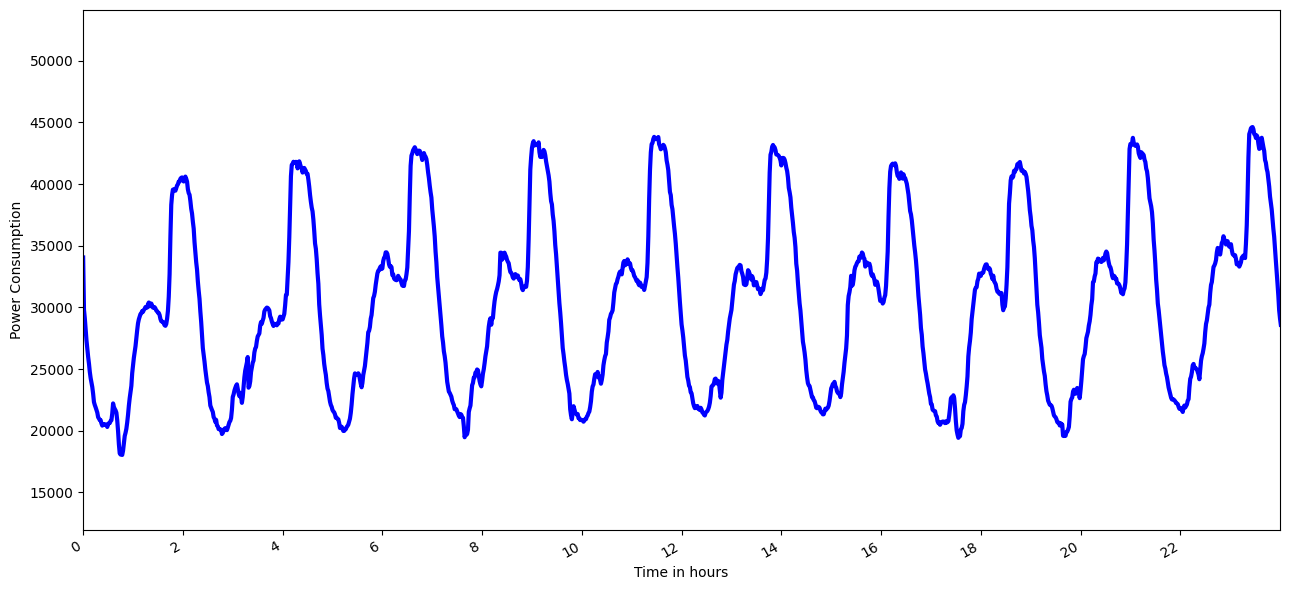

In [7]:
# let's plot the first 24 hours of the first zone 

fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df['PowerConsumption_Zone1'], 'b-', lw=3,)
ax.set_xlabel('Time in hours')
ax.set_ylabel('Power Consumption')

ax.set_xlim(0, 1440)
plt.xticks(np.arange(0, 1440, 120), np.arange(0, 24, 2))

fig.autofmt_xdate()
plt.tight_layout()

In [8]:
# create a new datetime column to have the time formatted properly

df['datetime'] = pd.to_datetime(df['Datetime'])

df.drop('Datetime', axis=1, inplace=True)

In [9]:
df.shape

(52416, 9)

In [10]:
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,datetime
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017-01-01 00:00:00
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017-01-01 00:10:00
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017-01-01 00:20:00
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017-01-01 00:30:00
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017-01-01 00:40:00


In [11]:
# let's resample the data hourly as we have noticed a clear hourly seasonality

hour_df = df.resample('H', on='datetime').sum()

hour_df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
datetime,,,,,,,,
2017-01-01 00:00:00,37.181,450.4,0.491,0.381,0.593,175187.84810,108160.48632,115512.28916
2017-01-01 01:00:00,33.293,465.5,0.492,0.341,0.675,147943.29114,96470.51672,102257.34940
2017-01-01 02:00:00,30.326,473.6,0.494,0.378,0.775,132498.22784,85984.19453,94056.86747
2017-01-01 03:00:00,30.026,462.5,0.497,0.359,0.846,124866.83544,79316.71732,89303.13253
2017-01-01 04:00:00,30.586,444.3,0.494,0.348,0.737,122855.69620,77529.48328,85902.65060


In [12]:
# reset the index
hour_df = hour_df.reset_index()

hour_df.head()

,datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,37.181,450.4,0.491,0.381,0.593,175187.84810,108160.48632,115512.28916
1,2017-01-01 01:00:00,33.293,465.5,0.492,0.341,0.675,147943.29114,96470.51672,102257.34940
2,2017-01-01 02:00:00,30.326,473.6,0.494,0.378,0.775,132498.22784,85984.19453,94056.86747
3,2017-01-01 03:00:00,30.026,462.5,0.497,0.359,0.846,124866.83544,79316.71732,89303.13253
4,2017-01-01 04:00:00,30.586,444.3,0.494,0.348,0.737,122855.69620,77529.48328,85902.65060


In [13]:
# check the shape of the new dataset

hour_df.shape

(8736, 9)

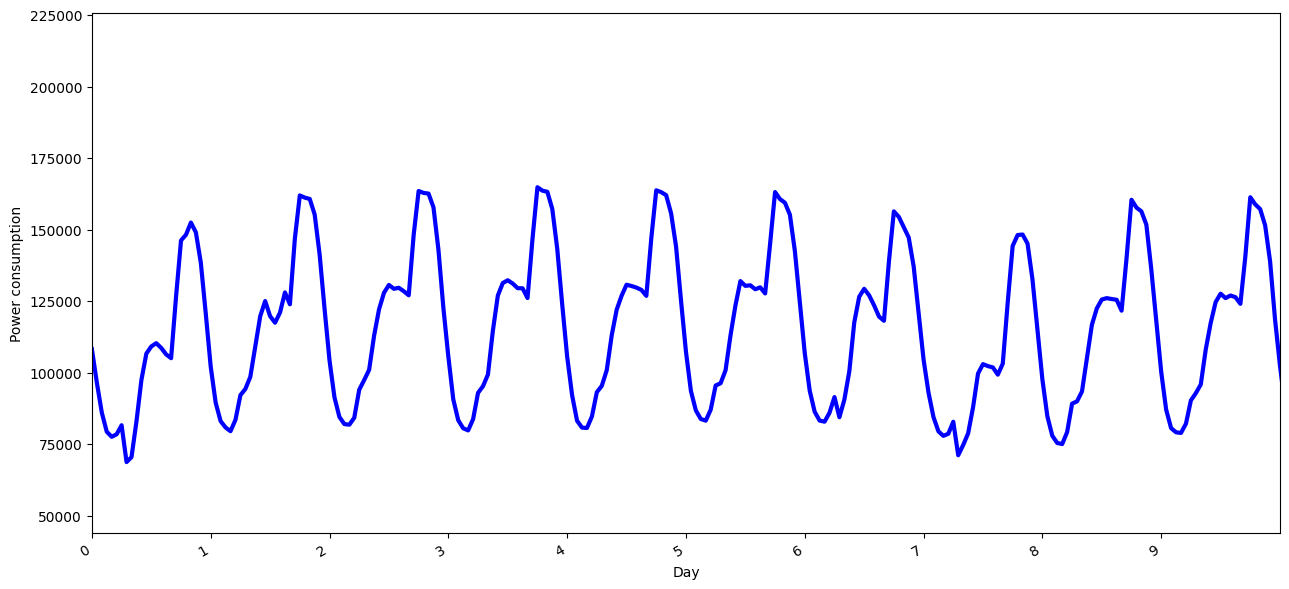

In [14]:
# let's plot the 10 first days of the second zone and observe the pattern

fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(hour_df['PowerConsumption_Zone2'], 'b-', lw=3)
ax.set_xlabel('Day')
ax.set_ylabel('Power consumption')

ax.set_xlim(0, 240)
plt.xticks(np.arange(0, 240, 24), [0, 1, 2, 3, 4, 5, 6, 7, 8 , 9])

fig.autofmt_xdate()
plt.tight_layout()

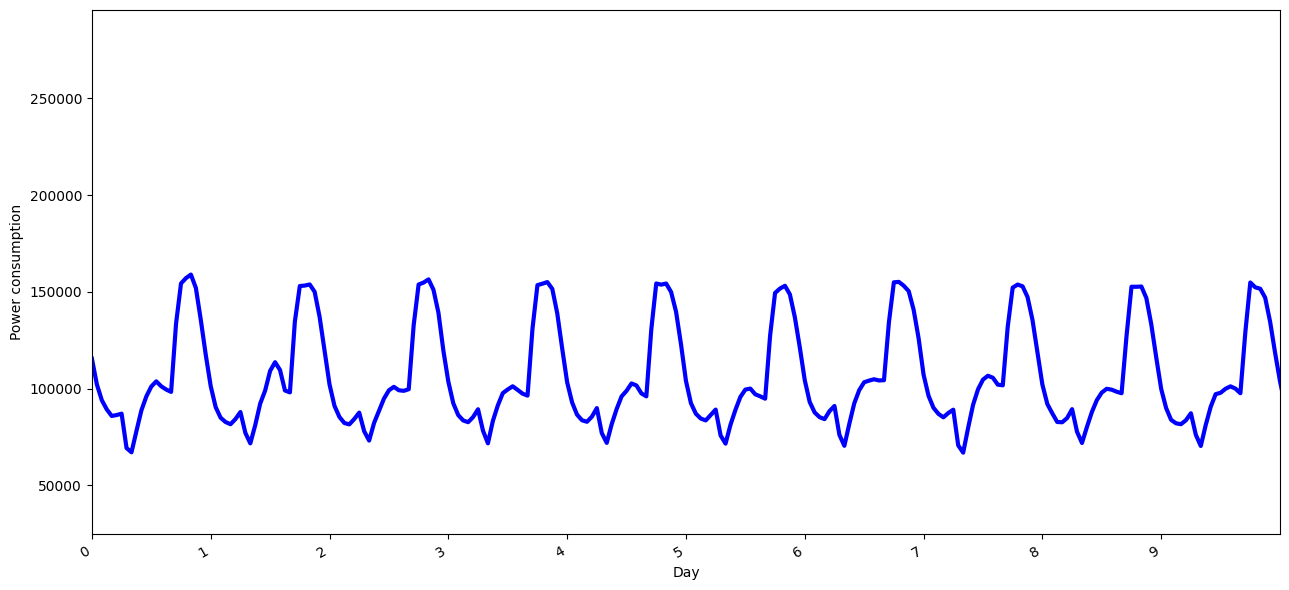

In [15]:
# let's plot the 10 first days of the third zone and observe the pattern

fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(hour_df['PowerConsumption_Zone3'], 'b-', lw=3)
ax.set_xlabel('Day')
ax.set_ylabel('Power consumption')

ax.set_xlim(0, 240)
plt.xticks(np.arange(0, 240, 24), [0, 1, 2, 3, 4, 5, 6, 7, 8 , 9])

fig.autofmt_xdate()
plt.tight_layout()

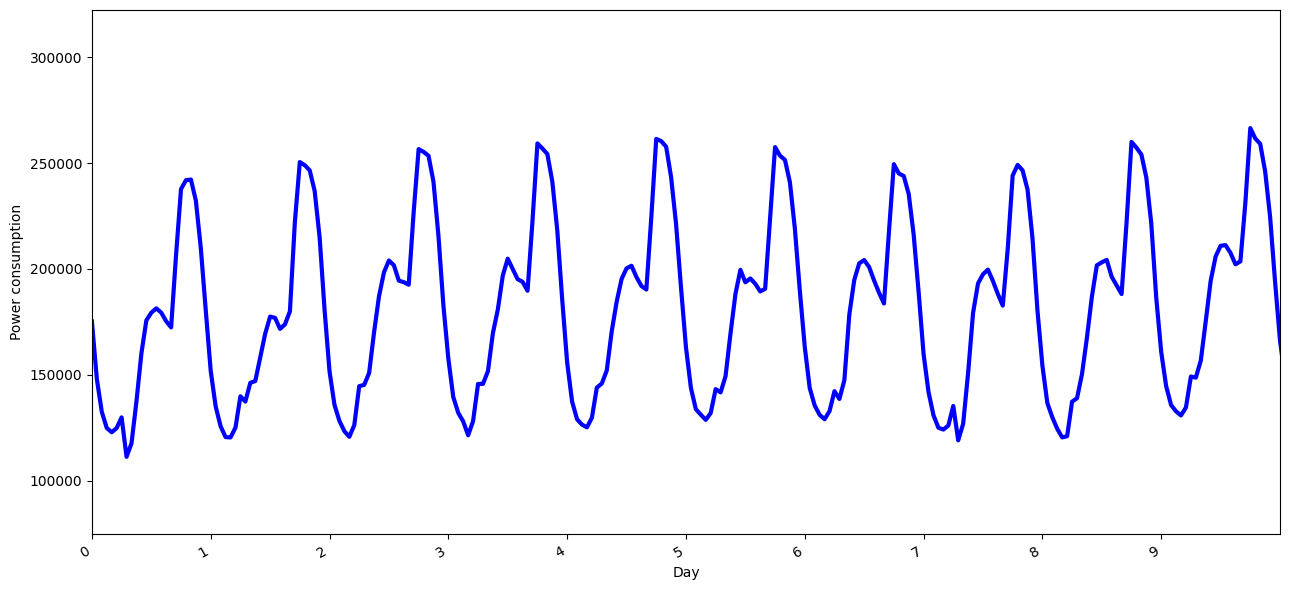

In [16]:
# let's plot the 10 first days of the second zone and observe the pattern

fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(hour_df['PowerConsumption_Zone1'], 'b-', lw=3)
ax.set_xlabel('Day')
ax.set_ylabel('Power consumption')

ax.set_xlim(0, 240)
plt.xticks(np.arange(0, 240, 24), [0, 1, 2, 3, 4, 5, 6, 7, 8 , 9])

fig.autofmt_xdate()
plt.tight_layout()

<p>The 3 targets variables exhibit a clear <b>daily seasonality!</b></p> 

### Feature Engineering

In [17]:
# let's obtain some basic statistics

hour_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,8736.0,112.860144,34.845742,21.613000,86.422500,112.555000,137.200000,238.17000
Humidity,8736.0,409.557111,92.854433,76.260000,349.947500,418.895000,488.100000,568.50000
WindSpeed,8736.0,11.756933,14.043304,0.328000,0.469000,0.513000,29.492000,35.60200
GeneralDiffuseFlows,8736.0,1096.179683,1564.921659,0.114000,0.384000,59.684500,1958.925000,5720.10000
DiffuseFlows,8736.0,450.168132,718.151521,0.240000,0.745000,49.447500,635.300000,5166.00000
PowerConsumption_Zone1,8736.0,194069.823382,42413.519258,85974.683540,157757.710383,194053.820085,223908.013310,311065.57159
PowerConsumption_Zone2,8736.0,126255.054494,30991.069215,52115.682281,102101.410295,124723.376960,148065.654115,217528.19430
PowerConsumption_Zone3,8736.0,107012.437310,39546.083934,37143.817526,78890.821477,98565.957850,129590.686943,283342.59414


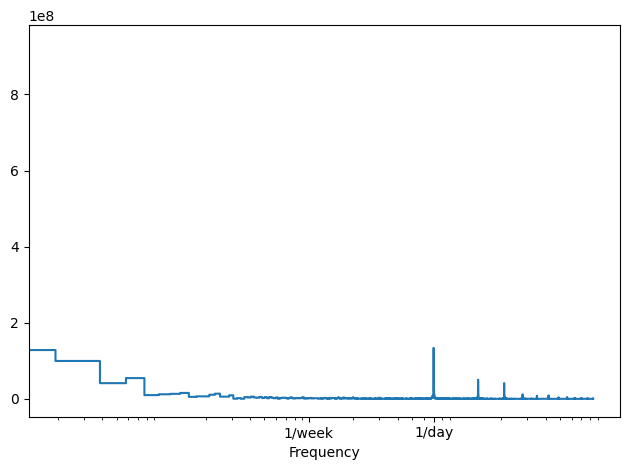

In [18]:
# let's check the seasonality of the 3 targets by implementing the Fourier series

fft = tf.signal.rfft(hour_df['PowerConsumption_Zone3'])
f_per_dataset = np.arange(0, len(fft))

n_sample_h = len(hour_df['PowerConsumption_Zone3'])
hours_per_week = 24 * 7
weeks_per_dataset = n_sample_h / hours_per_week

f_per_week = f_per_dataset / weeks_per_dataset

plt.step(f_per_week, np.abs(fft))
plt.xscale('log')
plt.xticks([1, 7], ['1/week', '1/day'])
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

As expected, the three targets show all daily seasonality

In [19]:
# let's encode this information

import datetime

timestamp_s = pd.to_datetime(hour_df['datetime']).map(datetime.datetime.timestamp)

day = 24*60*60

hour_df['day_sin'] = np.sin(timestamp_s*(2*np.pi/day))
hour_df['day_cos'] = np.cos(timestamp_s*(2*np.pi/day))

In [20]:
hour_df.head()

,datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,day_sin,day_cos
0,2017-01-01 00:00:00,37.181,450.4,0.491,0.381,0.593,175187.84810,108160.48632,115512.28916,-0.866025,-5.000000e-01
1,2017-01-01 01:00:00,33.293,465.5,0.492,0.341,0.675,147943.29114,96470.51672,102257.34940,-0.965926,-2.588190e-01
2,2017-01-01 02:00:00,30.326,473.6,0.494,0.378,0.775,132498.22784,85984.19453,94056.86747,-1.000000,-1.173817e-11
3,2017-01-01 03:00:00,30.026,462.5,0.497,0.359,0.846,124866.83544,79316.71732,89303.13253,-0.965926,2.588190e-01
4,2017-01-01 04:00:00,30.586,444.3,0.494,0.348,0.737,122855.69620,77529.48328,85902.65060,-0.866025,5.000000e-01


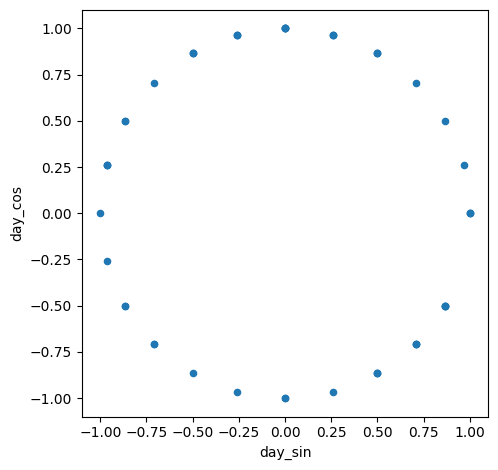

In [21]:
hour_df.sample(50).plot.scatter('day_sin','day_cos').set_aspect('equal');
plt.tight_layout()

In [22]:
#let's drop the datetime column

hour_df.drop('datetime', axis=1, inplace=True)
hour_df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,day_sin,day_cos
0,37.181,450.4,0.491,0.381,0.593,175187.84810,108160.48632,115512.28916,-0.866025,-5.000000e-01
1,33.293,465.5,0.492,0.341,0.675,147943.29114,96470.51672,102257.34940,-0.965926,-2.588190e-01
2,30.326,473.6,0.494,0.378,0.775,132498.22784,85984.19453,94056.86747,-1.000000,-1.173817e-11
3,30.026,462.5,0.497,0.359,0.846,124866.83544,79316.71732,89303.13253,-0.965926,2.588190e-01
4,30.586,444.3,0.494,0.348,0.737,122855.69620,77529.48328,85902.65060,-0.866025,5.000000e-01


In [23]:
# let's rename the 3 target variables for convenience

hour_df.rename(columns={'PowerConsumption_Zone1':'PC_Z1','PowerConsumption_Zone2':'PC_Z2','PowerConsumption_Zone3':'PC_Z3'}, inplace=True)

hour_df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PC_Z1,PC_Z2,PC_Z3,day_sin,day_cos
0,37.181,450.4,0.491,0.381,0.593,175187.84810,108160.48632,115512.28916,-0.866025,-5.000000e-01
1,33.293,465.5,0.492,0.341,0.675,147943.29114,96470.51672,102257.34940,-0.965926,-2.588190e-01
2,30.326,473.6,0.494,0.378,0.775,132498.22784,85984.19453,94056.86747,-1.000000,-1.173817e-11
3,30.026,462.5,0.497,0.359,0.846,124866.83544,79316.71732,89303.13253,-0.965926,2.588190e-01
4,30.586,444.3,0.494,0.348,0.737,122855.69620,77529.48328,85902.65060,-0.866025,5.000000e-01


In [24]:
hour_df.tail()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PC_Z1,PC_Z2,PC_Z3,day_sin,day_cos
8731,56.720,374.44,0.448,0.312,0.612,225082.88974,194986.19208,101560.62425,2.588190e-01,-0.965926
8732,54.250,383.94,0.482,0.316,0.630,222053.23193,192121.50966,101992.79712,1.561697e-12,-1.000000
8733,48.070,418.05,0.489,0.439,0.590,212149.04943,184547.40718,99653.30132,-2.588190e-01,-0.965926
8734,45.590,421.89,0.491,0.352,0.649,203960.45628,170864.68242,93689.31573,-5.000000e-01,-0.866025
8735,41.265,437.40,0.489,0.362,0.556,180647.90873,154280.45413,84861.46457,-7.071068e-01,-0.707107


In [25]:
# let's split the data into train and test set!

n =  len(hour_df)

train = hour_df[0:int(n*0.7)]
val = hour_df[int(n*0.7):int(n*0.9)]
test = hour_df[int(n*0.9):]

print(train.shape, val.shape, test.shape)

(6115, 10) (1747, 10) (874, 10)


In [26]:
# Get the min and max values of the targets (to be used in future lessons)

PC_Z1_max_train = np.max(train['PC_Z1'])
PC_Z1_min_train = np.min(train['PC_Z1'])
PC_Z1_min_train = np.min(train['PC_Z1'])
PC_Z1_max_test = np.max(test['PC_Z1'])
PC_Z1_min_test = np.min(test['PC_Z1'])

PC_Z2_max_train = np.max(train['PC_Z2'])
PC_Z2_min_train = np.min(train['PC_Z2'])
PC_Z2_min_train = np.min(train['PC_Z2'])
PC_Z2_max_test = np.max(test['PC_Z2'])
PC_Z2_min_test = np.min(test['PC_Z2'])

PC_Z3_max_train = np.max(train['PC_Z3'])
PC_Z3_min_train = np.min(train['PC_Z3'])
PC_Z3_min_train = np.min(train['PC_Z3'])
PC_Z3_max_test = np.max(test['PC_Z3'])
PC_Z3_min_test = np.min(test['PC_Z3'])

In [27]:
# scale the dataset

from sklearn. preprocessing import MinMaxScaler

train_scaler = MinMaxScaler()
test_scaler = MinMaxScaler()

train_scaler.fit(train[train.columns[:-2]])
test_scaler.fit(test[test.columns[:-2]])

train[train.columns[:-2]] =  train_scaler.transform(train[train.columns[:-2]])
val[val.columns[:-2]] =  train_scaler.transform(val[val.columns[:-2]])
test[test.columns[:-2]] =  test_scaler.transform(test[test.columns[:-2]])

In [28]:
train.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PC_Z1,PC_Z2,PC_Z3,day_sin,day_cos
0,0.071889,0.771518,0.005553,0.000047,0.000042,0.396343,0.338818,0.280452,-0.866025,-5.000000e-01
1,0.053935,0.802656,0.005587,0.000040,0.000057,0.275305,0.268147,0.223624,-0.965926,-2.588190e-01
2,0.040234,0.819359,0.005655,0.000046,0.000077,0.206688,0.204752,0.188465,-1.000000,-1.173817e-11
3,0.038849,0.796470,0.005758,0.000043,0.000091,0.172784,0.164444,0.168084,-0.965926,2.588190e-01
4,0.041435,0.758939,0.005655,0.000041,0.000069,0.163849,0.153639,0.153505,-0.866025,5.000000e-01


## <span style="color:brown">3. Data Modelling</span>

### <span style="color:brown">3.1 Deep Learning</span>

<p><b>MULTI-STEP LINEAR MODEL</b></p>

In [29]:
# let's import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import Model, Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

from tensorflow.keras.layers import Dense, Conv1D, LSTM, RNN

import warnings
warnings.filterwarnings('ignore')


In [30]:
# let's create windows of data with an appropriate function

def format_timeseries_data(df, input_length, output_length, target_names):
    
    if target_names is not None:
        target_indices = {name: i for i, name in enumerate(target_names)}
    col_indices = {name: i for i, name in enumerate(df.columns)}
    
    total_length = input_length + output_length
    
    input_slice = slice(0, input_length)
    output_slice = slice(input_length, None)
    
    data = np.array(df, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=total_length,
        sequence_stride=1,
        shuffle=True,
        batch_size=24
    )
    
    def split_to_input_output(x):
            
        inputs = x[:, input_slice, :]
        outputs = x[:, output_slice, :]
        
        if target_names is not None:
            outputs = tf.stack(
                [outputs[:,:,col_indices[name]] for name in target_names],
                axis=-1
            )

        inputs.set_shape([None, input_length, None])
        outputs.set_shape([None, output_length, None])
    
        return inputs, outputs
    
    ds = ds.map(split_to_input_output)
    
    return ds

In [31]:
# train the model

def train_model(model, train_ds, val_ds, patience=5, max_epochs=50):
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, mode='min')
    
    model.compile(loss=MeanSquaredError(), optimizer=Adam(), metrics=[MeanAbsoluteError()])
    
    history = model.fit(train_ds, epochs=max_epochs, validation_data=val_ds, callbacks=[early_stopping])
    
    return history

In [32]:
# define the windows of data for the model of the first zone

train_ds_ms = format_timeseries_data(train, 7, 7, ['PC_Z1'])
val_ds_ms = format_timeseries_data(val, 7, 7, ['PC_Z1'])
test_ds_ms = format_timeseries_data(test, 7, 7, ['PC_Z1'])

ms_sample_batch = next(iter(test_ds_ms))

In [33]:
# let's fit a linear model

ms_linear = Sequential([
    Dense(units=1)
])

ms_linear_history = train_model(ms_linear, train_ds_ms, val_ds_ms)

Epoch 1/50
255/255 [==============================] - 2s 4ms/step - loss: 0.2096 - mean_absolute_error: 0.3737 - val_loss: 0.1382 - val_mean_absolute_error: 0.2992
Epoch 2/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0774 - mean_absolute_error: 0.2289 - val_loss: 0.0677 - val_mean_absolute_error: 0.2127
Epoch 3/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0366 - mean_absolute_error: 0.1548 - val_loss: 0.0431 - val_mean_absolute_error: 0.1701
Epoch 4/50
255/255 [==============================] - 1s 2ms/step - loss: 0.0240 - mean_absolute_error: 0.1265 - val_loss: 0.0327 - val_mean_absolute_error: 0.1483
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0200 - mean_absolute_error: 0.1166 - val_loss: 0.0286 - val_mean_absolute_error: 0.1391
Epoch 6/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0183 - mean_absolute_error: 0.1118 - val_loss: 0.0256 - val_mean_absolute_error: 0.1319
Epoch 7/50
255/2

In [34]:
def plot_history(history):

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

    ax1.plot(history.history['loss'], label='Train')
    ax1.plot(history.history['val_loss'], label='Validation')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Loss')
    ax1.legend(loc='best')

    ax2.plot(history.history['mean_absolute_error'], label='Train')
    ax2.plot(history.history['val_mean_absolute_error'], label='Validation')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('MAE')
    ax2.set_title('Mean absolute error')
    ax2.legend(loc='best')

    plt.tight_layout()

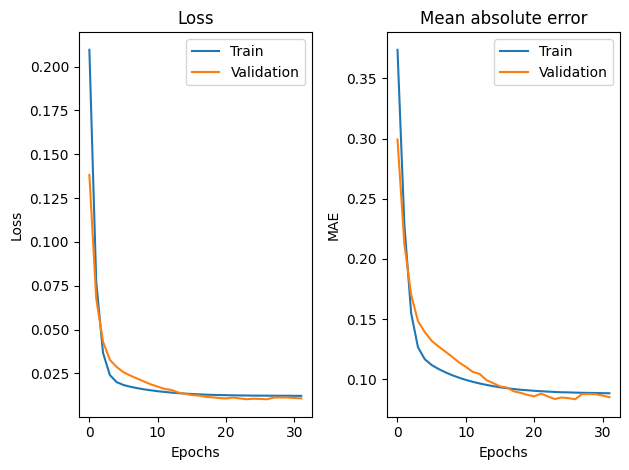

In [35]:
plot_history(ms_linear_history)

In [36]:
def plot_predictions(model, sample_batch, model_type):
    
    inputs, outputs = sample_batch
    preds = model(inputs)
    
    
        
    if model_type == 'multi_step':

        fig, ax = plt.subplots(figsize=(12, 8))
        
        actual_scaled = outputs.numpy().flatten()[:24]
        actual = actual_scaled * (PC_Z1_max_test - PC_Z1_min_test) + PC_Z1_min_test
        
        predictions_scaled = preds.numpy().flatten()[:24]
        predictions = predictions_scaled * (PC_Z1_max_train - PC_Z1_min_train) + PC_Z1_min_train

        ax.plot(actual, label='Actual')
        ax.plot(predictions, label='Predicted')
        ax.set_xlabel('Time in hour')
        ax.set_ylabel('Power Consumption Z1')
        ax.set_title('Predictions on a sample batch')
        ax.legend(loc='best')
        
    
    plt.tight_layout()

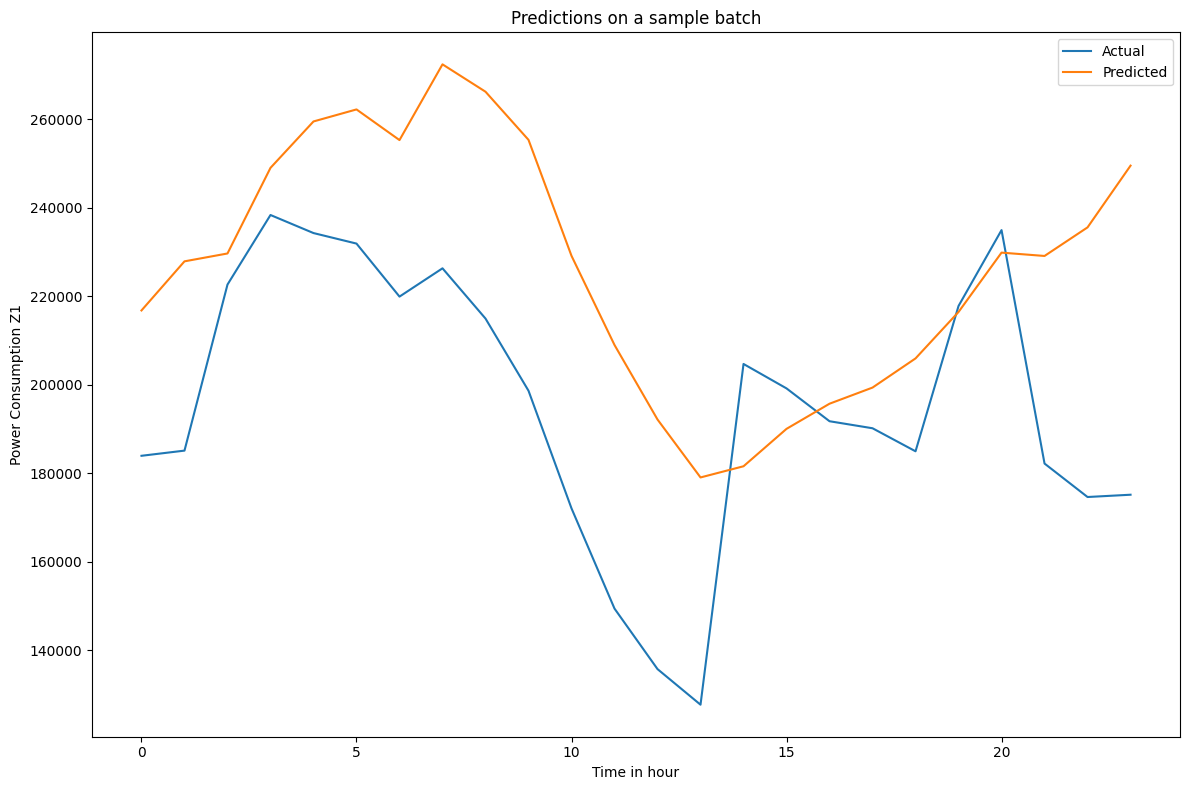

In [37]:
plot_predictions(ms_linear, ms_sample_batch, 'multi_step')

In [38]:
# let's provide the mean absolute error of the model

mae_linear_ms = ms_linear.evaluate(test_ds_ms)[1] 

36/36 [==============================] - 0s 2ms/step - loss: 0.0247 - mean_absolute_error: 0.1334


In [39]:
# define the windows of data for the model of second zone

train_ds_ms2 = format_timeseries_data(train, 7, 7, ['PC_Z2'])
val_ds_ms2 = format_timeseries_data(val, 7, 7, ['PC_Z2'])
test_ds_ms2 = format_timeseries_data(test, 7, 7, ['PC_Z2'])

ms2_sample_batch = next(iter(test_ds_ms2))

In [40]:
# let's fit a linear model

ms2_linear = Sequential([
    Dense(units=1)
])

ms2_linear_history = train_model(ms2_linear, train_ds_ms2, val_ds_ms2)

Epoch 1/50
255/255 [==============================] - 1s 3ms/step - loss: 0.4050 - mean_absolute_error: 0.5000 - val_loss: 0.1947 - val_mean_absolute_error: 0.3510
Epoch 2/50
255/255 [==============================] - 1s 2ms/step - loss: 0.0678 - mean_absolute_error: 0.2068 - val_loss: 0.0732 - val_mean_absolute_error: 0.2125
Epoch 3/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0364 - mean_absolute_error: 0.1519 - val_loss: 0.0514 - val_mean_absolute_error: 0.1792
Epoch 4/50
255/255 [==============================] - 1s 2ms/step - loss: 0.0293 - mean_absolute_error: 0.1351 - val_loss: 0.0436 - val_mean_absolute_error: 0.1654
Epoch 5/50
255/255 [==============================] - 1s 2ms/step - loss: 0.0258 - mean_absolute_error: 0.1261 - val_loss: 0.0383 - val_mean_absolute_error: 0.1548
Epoch 6/50
255/255 [==============================] - 1s 2ms/step - loss: 0.0229 - mean_absolute_error: 0.1186 - val_loss: 0.0346 - val_mean_absolute_error: 0.1471
Epoch 7/50
255/2

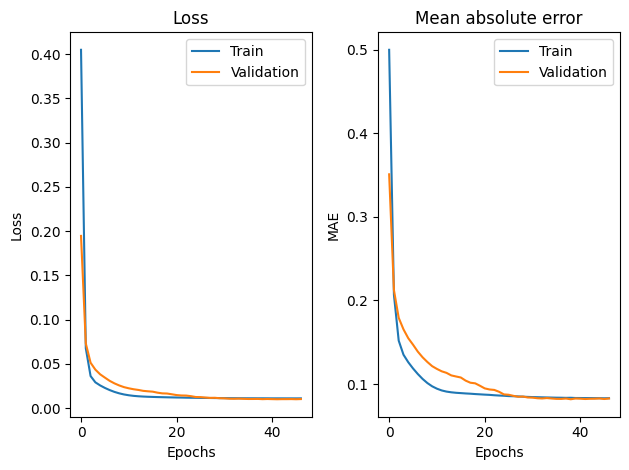

In [41]:
plot_history(ms2_linear_history)

In [42]:
# let's provide the mean absolute error of the model

mae_linear_ms2 = ms2_linear.evaluate(test_ds_ms2)[1] 

36/36 [==============================] - 0s 2ms/step - loss: 0.0336 - mean_absolute_error: 0.1543


In [43]:
# define the windows of data for the model of third zone

train_ds_ms3 = format_timeseries_data(train, 7, 7, ['PC_Z3'])
val_ds_ms3 = format_timeseries_data(val, 7, 7, ['PC_Z3'])
test_ds_ms3 = format_timeseries_data(test, 7, 7, ['PC_Z3'])

ms3_sample_batch = next(iter(test_ds_ms3))

In [44]:
# let's fit a linear model

ms3_linear = Sequential([
    Dense(units=1)
])

ms3_linear_history = train_model(ms3_linear, train_ds_ms3, val_ds_ms3)

Epoch 1/50
255/255 [==============================] - 1s 3ms/step - loss: 0.2419 - mean_absolute_error: 0.3841 - val_loss: 0.1701 - val_mean_absolute_error: 0.3374
Epoch 2/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0669 - mean_absolute_error: 0.2007 - val_loss: 0.1717 - val_mean_absolute_error: 0.3549
Epoch 3/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0486 - mean_absolute_error: 0.1693 - val_loss: 0.1529 - val_mean_absolute_error: 0.3386
Epoch 4/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0392 - mean_absolute_error: 0.1519 - val_loss: 0.1322 - val_mean_absolute_error: 0.3173
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0319 - mean_absolute_error: 0.1365 - val_loss: 0.1152 - val_mean_absolute_error: 0.2995
Epoch 6/50
255/255 [==============================] - 1s 2ms/step - loss: 0.0258 - mean_absolute_error: 0.1227 - val_loss: 0.1000 - val_mean_absolute_error: 0.2821
Epoch 7/50
255/2

In [45]:
# let's provide the mean absolute error of the model

mae_linear_ms3 = ms3_linear.evaluate(test_ds_ms3)[1] 

36/36 [==============================] - 0s 2ms/step - loss: 0.0486 - mean_absolute_error: 0.1922


In [46]:
# let's compile the MAE values of the linear model

MAE_linear = [0.1497, 0.1554, 0.1848]

<p><b>MULTI-STEP DEEP LEARNING</b></p>

In [47]:
# let's fit a deep learning model on the first zone

ms_dnn = Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

ms_dnn_history = train_model(ms_dnn, train_ds_ms, val_ds_ms)

ms_sample_batch_dnn = next(iter(test_ds_ms))

Epoch 1/50
255/255 [==============================] - 2s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0747 - val_loss: 0.0072 - val_mean_absolute_error: 0.0689
Epoch 2/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0044 - mean_absolute_error: 0.0493 - val_loss: 0.0072 - val_mean_absolute_error: 0.0698
Epoch 3/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0465 - val_loss: 0.0060 - val_mean_absolute_error: 0.0640
Epoch 4/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0037 - mean_absolute_error: 0.0452 - val_loss: 0.0056 - val_mean_absolute_error: 0.0610
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0036 - mean_absolute_error: 0.0445 - val_loss: 0.0048 - val_mean_absolute_error: 0.0570
Epoch 6/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0035 - mean_absolute_error: 0.0439 - val_loss: 0.0054 - val_mean_absolute_error: 0.0599
Epoch 7/50
255/2

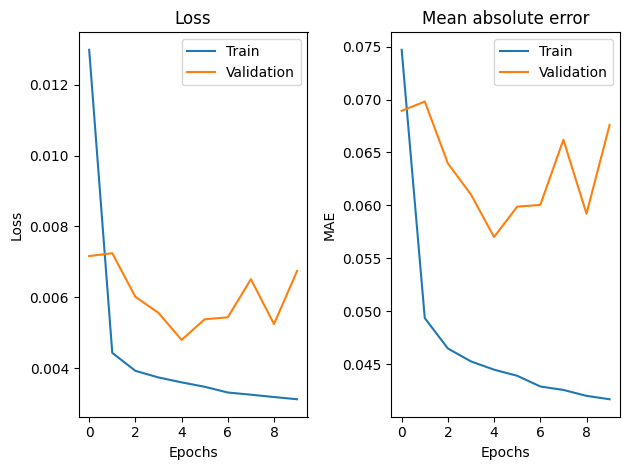

In [48]:
plot_history(ms_dnn_history)

In [49]:
# let's provide the mean absolute error of the deep learning model

mae_dnn_ms = ms_dnn.evaluate(test_ds_ms)[1] 

36/36 [==============================] - 0s 2ms/step - loss: 0.0283 - mean_absolute_error: 0.1344


In [50]:
# let's fit a deep learning model on the second zone

ms2_dnn = Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

ms2_dnn_history = train_model(ms2_dnn, train_ds_ms2, val_ds_ms2)

ms2_sample_batch_dnn = next(iter(test_ds_ms2))

Epoch 1/50
255/255 [==============================] - 2s 5ms/step - loss: 0.0139 - mean_absolute_error: 0.0817 - val_loss: 0.0154 - val_mean_absolute_error: 0.0986
Epoch 2/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0541 - val_loss: 0.0093 - val_mean_absolute_error: 0.0774
Epoch 3/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0501 - val_loss: 0.0085 - val_mean_absolute_error: 0.0725
Epoch 4/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0042 - mean_absolute_error: 0.0488 - val_loss: 0.0084 - val_mean_absolute_error: 0.0727
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0040 - mean_absolute_error: 0.0482 - val_loss: 0.0079 - val_mean_absolute_error: 0.0707
Epoch 6/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0038 - mean_absolute_error: 0.0470 - val_loss: 0.0097 - val_mean_absolute_error: 0.0750
Epoch 7/50
255/2

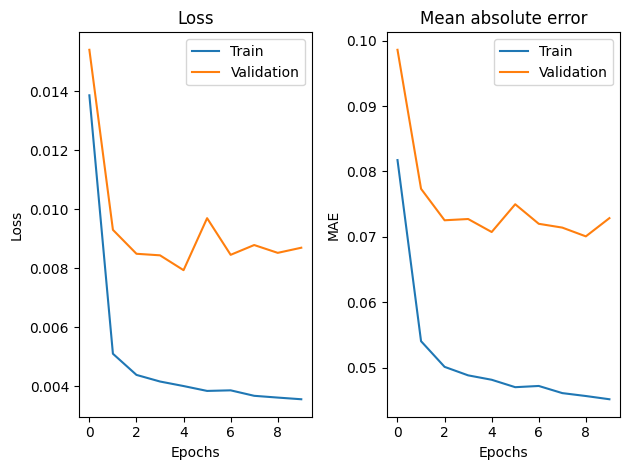

In [51]:
plot_history(ms2_dnn_history)

In [52]:
# let's provide the mean absolute error of the deep learning model

mae_dnn_ms2 = ms2_dnn.evaluate(test_ds_ms2)[1] 

36/36 [==============================] - 0s 2ms/step - loss: 0.0327 - mean_absolute_error: 0.1474


In [53]:
# let's fit a deep learning model on the third zone

ms3_dnn = Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

ms3_dnn_history = train_model(ms3_dnn, train_ds_ms3, val_ds_ms3)

ms3_sample_batch_dnn = next(iter(test_ds_ms3))

Epoch 1/50
255/255 [==============================] - 2s 5ms/step - loss: 0.0054 - mean_absolute_error: 0.0536 - val_loss: 0.0094 - val_mean_absolute_error: 0.0808
Epoch 2/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0021 - mean_absolute_error: 0.0340 - val_loss: 0.0062 - val_mean_absolute_error: 0.0640
Epoch 3/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0017 - mean_absolute_error: 0.0306 - val_loss: 0.0048 - val_mean_absolute_error: 0.0563
Epoch 4/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0015 - mean_absolute_error: 0.0293 - val_loss: 0.0030 - val_mean_absolute_error: 0.0430
Epoch 5/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0014 - mean_absolute_error: 0.0284 - val_loss: 0.0025 - val_mean_absolute_error: 0.0388
Epoch 6/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0014 - mean_absolute_error: 0.0278 - val_loss: 0.0047 - val_mean_absolute_error: 0.0561
Epoch 7/50
255/2

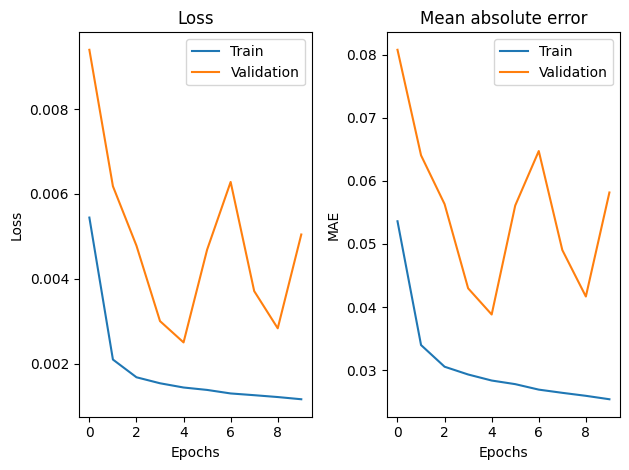

In [54]:
plot_history(ms3_dnn_history)

In [55]:
# let's provide the mean absolute error of the deep learning model

mae_dnn_ms3 = ms3_dnn.evaluate(test_ds_ms3)[1] 

36/36 [==============================] - 0s 2ms/step - loss: 0.0455 - mean_absolute_error: 0.1755


In [56]:
# let's compile the MAE values for the deep learning

MAE_dnn = [0.1108, 0.1528, 0.1663]

<p><b>LONG SHORT-TERM MEMORY(LSTM)</b></p>

In [57]:
# let's fit a LSTM model on the first zone

ms_lstm = Sequential([
    LSTM(32, return_sequences=True),
    Dense(1)
])

ms_lstm_history = train_model(ms_lstm, train_ds_ms, val_ds_ms)

Epoch 1/50
255/255 [==============================] - 5s 7ms/step - loss: 0.0350 - mean_absolute_error: 0.1322 - val_loss: 0.0100 - val_mean_absolute_error: 0.0799
Epoch 2/50
255/255 [==============================] - 2s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0768 - val_loss: 0.0078 - val_mean_absolute_error: 0.0711
Epoch 3/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0078 - mean_absolute_error: 0.0685 - val_loss: 0.0070 - val_mean_absolute_error: 0.0682
Epoch 4/50
255/255 [==============================] - 2s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0632 - val_loss: 0.0067 - val_mean_absolute_error: 0.0668
Epoch 5/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0603 - val_loss: 0.0071 - val_mean_absolute_error: 0.0689
Epoch 6/50
255/255 [==============================] - 1s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0580 - val_loss: 0.0065 - val_mean_absolute_error: 0.0660
Epoch 7/50
255/2

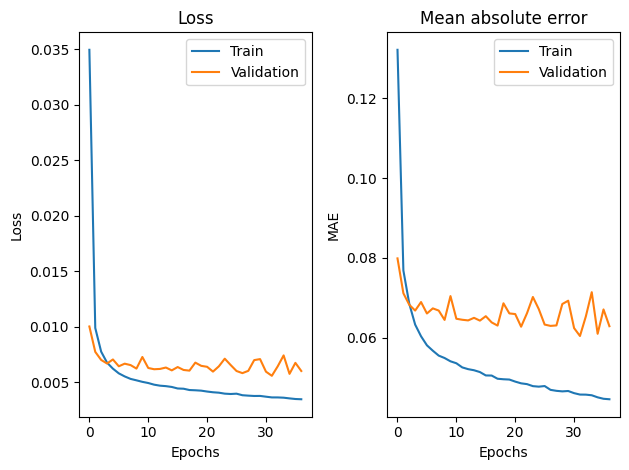

In [58]:
plot_history(ms_lstm_history)

In [59]:
# let's provide the mean absolute error of LSTM model

mae_lstm_ms = ms_lstm.evaluate(test_ds_ms)[1] 

36/36 [==============================] - 0s 3ms/step - loss: 0.0244 - mean_absolute_error: 0.1257


In [60]:
# let's fit a LSTM model on the second zone

ms2_lstm = Sequential([
    LSTM(32, return_sequences=True),
    Dense(1)
])

ms2_lstm_history = train_model(ms2_lstm, train_ds_ms2, val_ds_ms2)

Epoch 1/50
255/255 [==============================] - 5s 8ms/step - loss: 0.0306 - mean_absolute_error: 0.1258 - val_loss: 0.0168 - val_mean_absolute_error: 0.0988
Epoch 2/50
255/255 [==============================] - 1s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0748 - val_loss: 0.0134 - val_mean_absolute_error: 0.0913
Epoch 3/50
255/255 [==============================] - 1s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0685 - val_loss: 0.0123 - val_mean_absolute_error: 0.0872
Epoch 4/50
255/255 [==============================] - 1s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0647 - val_loss: 0.0122 - val_mean_absolute_error: 0.0874
Epoch 5/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0614 - val_loss: 0.0103 - val_mean_absolute_error: 0.0812
Epoch 6/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0596 - val_loss: 0.0102 - val_mean_absolute_error: 0.0806
Epoch 7/50
255/2

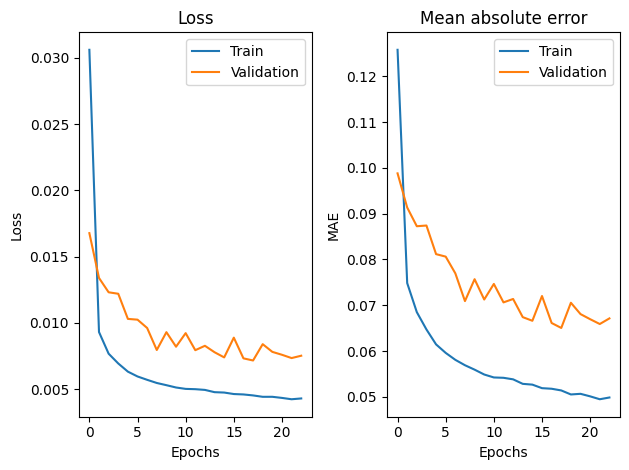

In [61]:
plot_history(ms2_lstm_history)

In [62]:
# let's provide the mean absolute error of LSTM model

mae_lstm_ms2 = ms2_lstm.evaluate(test_ds_ms2)[1] 

36/36 [==============================] - 0s 3ms/step - loss: 0.0294 - mean_absolute_error: 0.1404


In [63]:
# let's fit a LSTM model on the third zone

ms3_lstm = Sequential([
    LSTM(32, return_sequences=True),
    Dense(1)
])

ms3_lstm_history = train_model(ms3_lstm, train_ds_ms3, val_ds_ms3)

Epoch 1/50
255/255 [==============================] - 5s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0758 - val_loss: 0.0163 - val_mean_absolute_error: 0.1126
Epoch 2/50
255/255 [==============================] - 2s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0511 - val_loss: 0.0115 - val_mean_absolute_error: 0.0918
Epoch 3/50
255/255 [==============================] - 2s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0460 - val_loss: 0.0079 - val_mean_absolute_error: 0.0738
Epoch 4/50
255/255 [==============================] - 1s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0428 - val_loss: 0.0079 - val_mean_absolute_error: 0.0734
Epoch 5/50
255/255 [==============================] - 1s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0409 - val_loss: 0.0058 - val_mean_absolute_error: 0.0612
Epoch 6/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0393 - val_loss: 0.0064 - val_mean_absolute_error: 0.0640
Epoch 7/50
255/2

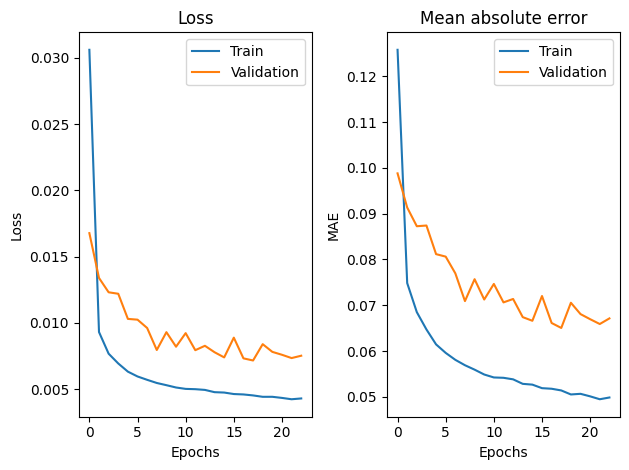

In [64]:
plot_history(ms2_lstm_history)

In [65]:
# let's provide the mean absolute error of LSTM model

mae_lstm_ms3 = ms3_lstm.evaluate(test_ds_ms3)[1] 

36/36 [==============================] - 0s 3ms/step - loss: 0.0442 - mean_absolute_error: 0.1716


In [66]:
# let's compile the MAE values of the LSTM models

MAE_lstm = [0.1241, 0.1435, 0.1812]

<p><b>CONVOLUTION NEURAL NETWORK(CNN)</b></p>

In [67]:
KERNEL_LENGTH = 6
OUTPUT_LENGTH = 7
INPUT_LENGTH = OUTPUT_LENGTH + KERNEL_LENGTH - 1

train_ds_ms_1 = format_timeseries_data(train, INPUT_LENGTH, OUTPUT_LENGTH, ['PC_Z1'])
val_ds_ms_1 = format_timeseries_data(val, INPUT_LENGTH, OUTPUT_LENGTH, ['PC_Z1'])
test_ds_ms_1 = format_timeseries_data(test, INPUT_LENGTH, OUTPUT_LENGTH, ['PC_Z1'])

In [68]:
#let's fit a cnn model

ms_cnn = Sequential([
    Conv1D(filters=32, kernel_size=(KERNEL_LENGTH,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

ms_cnn_history = train_model(ms_cnn, train_ds_ms_1, val_ds_ms_1)

Epoch 1/50
255/255 [==============================] - 2s 5ms/step - loss: 0.0118 - mean_absolute_error: 0.0742 - val_loss: 0.0061 - val_mean_absolute_error: 0.0644
Epoch 2/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0512 - val_loss: 0.0063 - val_mean_absolute_error: 0.0652
Epoch 3/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0042 - mean_absolute_error: 0.0484 - val_loss: 0.0057 - val_mean_absolute_error: 0.0620
Epoch 4/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0039 - mean_absolute_error: 0.0459 - val_loss: 0.0101 - val_mean_absolute_error: 0.0824
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0038 - mean_absolute_error: 0.0459 - val_loss: 0.0061 - val_mean_absolute_error: 0.0633
Epoch 6/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0034 - mean_absolute_error: 0.0436 - val_loss: 0.0063 - val_mean_absolute_error: 0.0645
Epoch 7/50
255/2

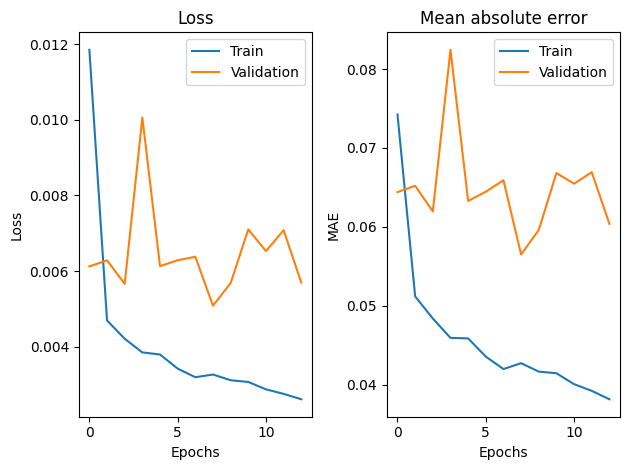

In [69]:
plot_history(ms_cnn_history)

In [70]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 2:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
    
lr_scheduler = LearningRateScheduler(scheduler)

def train_model(model, train_ds, val_ds, patience=5, max_epochs=50, use_scheduler=False):
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, mode='min')
    
    model.compile(loss=MeanSquaredError(), optimizer=Adam(), metrics=[MeanAbsoluteError()])
    
    history = model.fit(train_ds, epochs=max_epochs, validation_data=val_ds, callbacks=[early_stopping])
    
    if use_scheduler == True:
        history = model.fit(train_ds, epochs=max_epochs, validation_data=val_ds, callbacks=[early_stopping, lr_scheduler])
    
    return history

In [71]:
#let's fit a cnn model for the first zone

ms_cnn = Sequential([
    Conv1D(filters=32, kernel_size=(KERNEL_LENGTH,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

ms_cnn_history = train_model(ms_cnn, train_ds_ms_1, val_ds_ms_1, use_scheduler=True)

Epoch 1/50
255/255 [==============================] - 2s 4ms/step - loss: 0.0243 - mean_absolute_error: 0.0964 - val_loss: 0.0066 - val_mean_absolute_error: 0.0672
Epoch 2/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0537 - val_loss: 0.0068 - val_mean_absolute_error: 0.0683
Epoch 3/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0497 - val_loss: 0.0064 - val_mean_absolute_error: 0.0658
Epoch 4/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0042 - mean_absolute_error: 0.0475 - val_loss: 0.0081 - val_mean_absolute_error: 0.0733
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0041 - mean_absolute_error: 0.0470 - val_loss: 0.0063 - val_mean_absolute_error: 0.0647
Epoch 6/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0037 - mean_absolute_error: 0.0448 - val_loss: 0.0063 - val_mean_absolute_error: 0.0649
Epoch 7/50
255/2

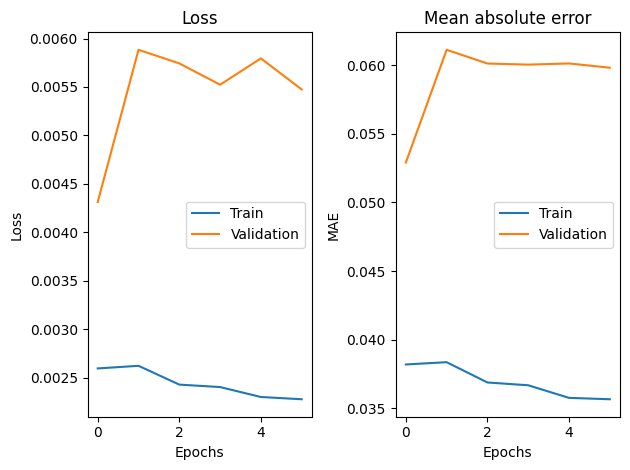

In [72]:
plot_history(ms_cnn_history)

In [73]:
# let's provide the mean absolute error of the CNN model

mae_cnn_ms = ms_cnn.evaluate(test_ds_ms_1)[1] 

36/36 [==============================] - 0s 2ms/step - loss: 0.0252 - mean_absolute_error: 0.1242


In [74]:
KERNEL_LENGTH = 6
OUTPUT_LENGTH = 7
INPUT_LENGTH = OUTPUT_LENGTH + KERNEL_LENGTH - 1

train_ds_ms_2 = format_timeseries_data(train, INPUT_LENGTH, OUTPUT_LENGTH, ['PC_Z2'])
val_ds_ms_2 = format_timeseries_data(val, INPUT_LENGTH, OUTPUT_LENGTH, ['PC_Z2'])
test_ds_ms_2 = format_timeseries_data(test, INPUT_LENGTH, OUTPUT_LENGTH, ['PC_Z2'])

In [75]:
#let's fit a cnn model for the second zone

ms2_cnn = Sequential([
    Conv1D(filters=32, kernel_size=(KERNEL_LENGTH,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

ms2_cnn_history = train_model(ms2_cnn, train_ds_ms_2, val_ds_ms_2, use_scheduler=True)

Epoch 1/50
255/255 [==============================] - 2s 4ms/step - loss: 0.0287 - mean_absolute_error: 0.1044 - val_loss: 0.0169 - val_mean_absolute_error: 0.1030
Epoch 2/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0065 - mean_absolute_error: 0.0618 - val_loss: 0.0136 - val_mean_absolute_error: 0.0924
Epoch 3/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0055 - mean_absolute_error: 0.0563 - val_loss: 0.0112 - val_mean_absolute_error: 0.0808
Epoch 4/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0049 - mean_absolute_error: 0.0530 - val_loss: 0.0092 - val_mean_absolute_error: 0.0720
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0045 - mean_absolute_error: 0.0509 - val_loss: 0.0077 - val_mean_absolute_error: 0.0659
Epoch 6/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0043 - mean_absolute_error: 0.0492 - val_loss: 0.0072 - val_mean_absolute_error: 0.0656
Epoch 7/50
255/2

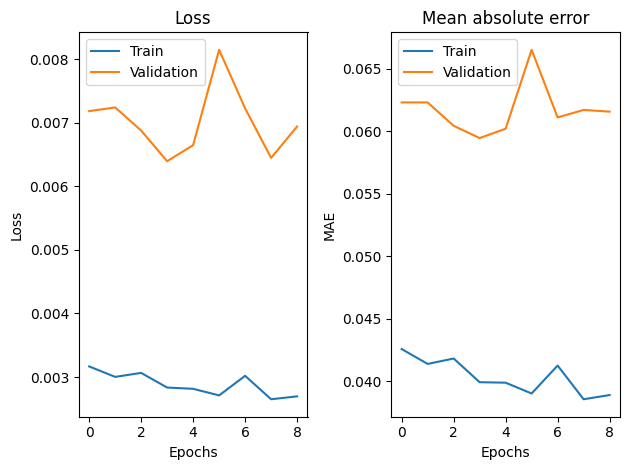

In [76]:
plot_history(ms2_cnn_history)

In [77]:
# let's provide the mean absolute error of the CNN model

mae_cnn_ms2 = ms2_cnn.evaluate(test_ds_ms_2)[1] 

36/36 [==============================] - 0s 2ms/step - loss: 0.0412 - mean_absolute_error: 0.1773


In [78]:
KERNEL_LENGTH = 6
OUTPUT_LENGTH = 7
INPUT_LENGTH = OUTPUT_LENGTH + KERNEL_LENGTH - 1

train_ds_ms_3 = format_timeseries_data(train, INPUT_LENGTH, OUTPUT_LENGTH, ['PC_Z3'])
val_ds_ms_3 = format_timeseries_data(val, INPUT_LENGTH, OUTPUT_LENGTH, ['PC_Z3'])
test_ds_ms_3 = format_timeseries_data(test, INPUT_LENGTH, OUTPUT_LENGTH, ['PC_Z3'])

In [79]:
#let's fit a cnn model for the third zone

ms3_cnn = Sequential([
    Conv1D(filters=32, kernel_size=(KERNEL_LENGTH,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

ms3_cnn_history = train_model(ms3_cnn, train_ds_ms_3, val_ds_ms_3, use_scheduler=True)

Epoch 1/50
255/255 [==============================] - 2s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0623 - val_loss: 0.0089 - val_mean_absolute_error: 0.0778
Epoch 2/50
255/255 [==============================] - 1s 4ms/step - loss: 0.0021 - mean_absolute_error: 0.0349 - val_loss: 0.0029 - val_mean_absolute_error: 0.0428
Epoch 3/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0018 - mean_absolute_error: 0.0315 - val_loss: 0.0038 - val_mean_absolute_error: 0.0483
Epoch 4/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0015 - mean_absolute_error: 0.0288 - val_loss: 0.0049 - val_mean_absolute_error: 0.0569
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0014 - mean_absolute_error: 0.0277 - val_loss: 0.0048 - val_mean_absolute_error: 0.0560
Epoch 6/50
255/255 [==============================] - 1s 3ms/step - loss: 0.0013 - mean_absolute_error: 0.0273 - val_loss: 0.0039 - val_mean_absolute_error: 0.0498
Epoch 7/50
255/2

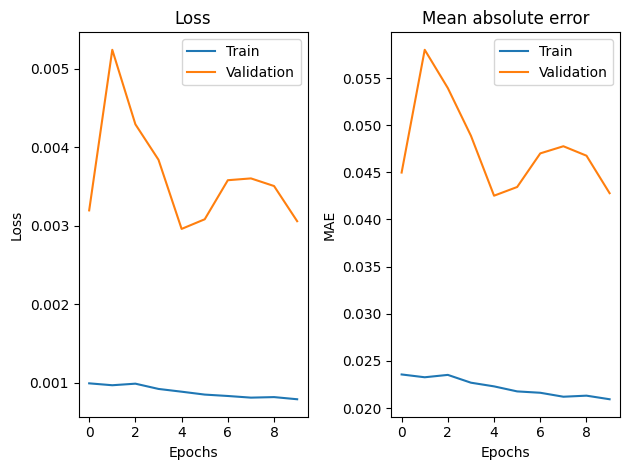

In [80]:
plot_history(ms3_cnn_history)

In [81]:
# let's provide the mean absolute error of the CNN model

mae_cnn_ms3 = ms3_cnn.evaluate(test_ds_ms_3)[1] 

36/36 [==============================] - 0s 2ms/step - loss: 0.0482 - mean_absolute_error: 0.1770


In [82]:
# let's compile the MAE values for the cnn models

MAE_cnn = [0.1246, 0.2014, 0.1824]

In [83]:
MAE_cnn_df =  pd.DataFrame(MAE_cnn)
MAE_cnn_df.mean()

0    0.169467
dtype: float64

In [84]:
MAE_linear_df =  pd.DataFrame(MAE_linear)
MAE_linear_df.mean()

0    0.1633
dtype: float64

In [85]:
MAE_dnn_df =  pd.DataFrame(MAE_dnn)
MAE_dnn_df.mean()

0    0.1433
dtype: float64

In [86]:
MAE_lstm_df = pd.DataFrame(MAE_lstm)
MAE_lstm_df.mean()

0    0.1496
dtype: float64

In [87]:
def plot_evaluation(model_list, mae):
    
    fig, ax = plt.subplots()
    
    ax.bar(model_list, mae, width=0.3)
    ax.set_ylabel('MAE')
    ax.set_xlabel('Models')
    ax.set_ylim(0, max(mae)+0.15)
    for index, value in enumerate(mae):
        ax.text(x=index, y=value+0.005, s=str(round(value, 3)), ha='center')
    
    plt.tight_layout()

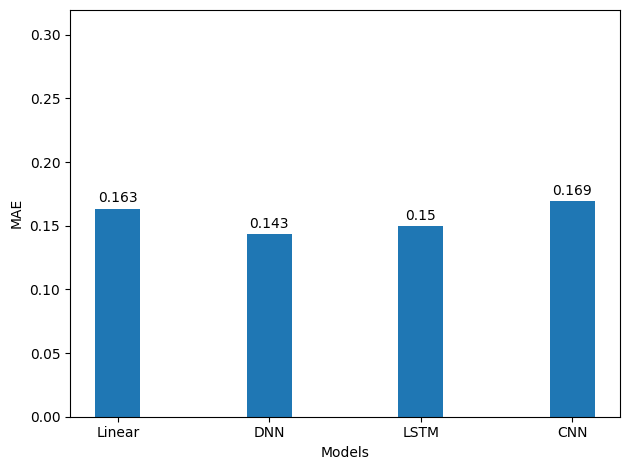

In [88]:
model_list = ['Linear', 'DNN', 'LSTM', 'CNN']

ms_mae = [0.1633, 0.1433, 0.1496, 0.169467 ]

plot_evaluation(model_list, ms_mae)

<p>the Deep learning model has the lowest MAE value, it will then be chosen to produce power consumption forecast for the three zones</p>

<p><b>FORECASTS</b></p>

In [89]:
# forecasts for the first zone

inputs, outputs = ms_sample_batch_dnn
preds = ms_dnn(inputs)

PC_Z1_predictions_scaled = preds.numpy().flatten()
PC_Z1_predictions = PC_Z1_predictions_scaled * (PC_Z1_max_train - PC_Z1_min_train) + PC_Z1_min_train

PC_Z1_predictions

array([182085.31, 195879.92, 195941.66, 199655.73, 203980.42, 201948.53,
       200828.53, 217511.38, 222381.34, 227006.06, 220893.31, 206559.34,
       206302.22, 208847.25, 207328.06, 199579.83, 212603.81, 229923.75,
       255172.75, 272952.  , 262730.66, 194455.47, 199855.94, 204213.36,
       204910.19, 208181.44, 202766.44, 218968.88, 274257.72, 252181.12,
       220970.1 , 232758.03, 201058.28, 190744.88, 178854.69, 180775.06,
       197253.56, 207121.5 , 210706.31, 217172.9 , 217370.78, 205626.78,
       193418.28, 177944.4 , 171951.31, 159113.75, 141329.64, 137346.95,
       139724.5 , 145094.45, 166496.97, 184125.34, 198490.1 , 217511.38,
       222381.34, 227006.06, 190006.1 , 183919.47, 151605.94, 132639.6 ,
       139901.47, 158651.52, 183474.61, 227277.62, 211005.66, 220471.66,
       188220.38, 180379.12, 172494.25, 157795.2 , 217370.78, 205626.78,
       199194.06, 198408.23, 207133.38, 225549.  , 262251.03, 209027.67,
       212584.3 , 214603.25, 207628.31, 203627.22, 

In [90]:
# forecasts for the second zone

inputs, outputs = ms2_sample_batch_dnn
preds = ms2_dnn(inputs)

PC_Z2_predictions_scaled = preds.numpy().flatten()
PC_Z2_predictions = PC_Z2_predictions_scaled * (PC_Z2_max_train - PC_Z2_min_train) + PC_Z2_min_train

PC_Z2_predictions

array([128438.47 , 136851.83 , 141093.02 , 151804.3  , 144357.02 ,
       140740.92 , 141489.81 ,  86531.37 , 103385.   , 119054.61 ,
       127337.58 , 127158.234, 139250.75 , 127546.8  , 159669.34 ,
       147324.25 , 139157.28 , 140715.   , 130043.36 , 143086.56 ,
       162272.83 , 111795.83 , 120818.64 , 125026.266, 130889.75 ,
       134779.9  , 142100.17 , 131458.28 ,  98131.234, 110577.89 ,
       132771.55 , 152522.06 , 158644.25 , 158935.45 , 151180.38 ,
       109013.45 ,  98491.414, 102778.28 , 110147.52 , 123011.234,
       135676.36 , 146820.86 , 159071.67 , 173104.05 , 168463.9  ,
       162763.78 , 143859.8  , 165375.1  , 142452.06 , 121560.2  ,
       127329.45 , 129982.91 , 133960.25 , 135582.28 , 132987.02 ,
       132910.81 , 133264.89 , 149089.02 , 154830.23 , 149152.62 ,
       143032.31 , 130953.17 , 150136.61 , 162763.78 , 143859.8  ,
       165375.1  , 142452.06 , 129088.86 , 123214.125, 115000.34 ,
       112649.32 , 112433.4  , 116418.125, 116615.12 , 102698.

In [91]:
# forecasts for the third zone

inputs, outputs = ms3_sample_batch_dnn
preds = ms3_dnn(inputs)

PC_Z3_predictions_scaled = preds.numpy().flatten()
PC_Z3_predictions = PC_Z3_predictions_scaled * (PC_Z3_max_train - PC_Z3_min_train) + PC_Z3_min_train

PC_Z3_predictions

array([122880.336, 129802.38 , 136740.62 , 142694.38 , 160342.69 ,
       184990.42 , 182796.61 , 166015.31 , 205553.53 , 177324.75 ,
       165499.11 , 153679.4  , 137058.53 , 114837.64 , 117555.484,
       121150.23 , 132266.53 , 149098.36 , 177823.69 , 188617.42 ,
       178697.14 , 128057.83 , 151267.06 , 179357.62 , 184819.52 ,
       183885.98 , 169843.3  , 152454.17 , 152906.47 , 178732.4  ,
       172253.   , 128543.516, 112587.195, 115727.65 , 123735.98 ,
       148292.27 , 177236.14 , 193225.62 , 192431.44 , 177329.14 ,
       163474.16 , 200586.28 , 160360.31 , 168000.72 , 161626.66 ,
       146221.28 , 151023.1  , 204390.64 , 178040.17 , 122386.2  ,
       126263.96 , 142237.27 , 172881.31 , 173986.16 , 129230.336,
       117555.484, 179550.9  , 188421.05 , 176402.14 , 157540.88 ,
       141618.73 , 172808.47 , 166999.7  , 128632.234, 145643.14 ,
       173989.84 , 205480.1  , 200004.02 , 149642.22 , 134696.47 ,
       153550.34 , 148522.31 , 134417.58 , 123699.375, 115309.

In [92]:
# let's merge the predictions in a single dataframe

predictions = pd.DataFrame({'pred_Z1': PC_Z1_predictions, 'pred_Z2': PC_Z2_predictions, 'pred_Z3': PC_Z3_predictions})
print(predictions)

           pred_Z1        pred_Z2        pred_Z3
0    182085.312500  128438.468750  122880.335938
1    195879.921875  136851.828125  129802.382812
2    195941.656250  141093.015625  136740.625000
3    199655.734375  151804.296875  142694.375000
4    203980.421875  144357.015625  160342.687500
..             ...            ...            ...
163  177601.125000  120932.703125  156139.125000
164  187332.218750  130467.687500  150989.031250
165  194112.750000  127980.531250  106831.171875
166  198692.890625  133482.343750   99004.109375
167  200512.687500  135312.687500  102484.867188

[168 rows x 3 columns]


<p>We have obtained 168 predictions. Since the resampled data is given hourly; that is exactly a week prediciton of power consumption in each zone as labelled!</p>